<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan</font></h1>
<h1 align=center><font size = 4> Part A: Data Cleaning and Processing</font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

1. https://www.kaggle.com/code/kkhandekar/an-introduction-to-pycaret/notebook.
2. https://towardsdatascience.com/5-things-you-dont-know-about-pycaret-528db0436eec
3. https://www.dataquest.io/blog/understanding-regression-error-metrics/ 
4. https://www.analyticsvidhya.com/blog/2021/07/automl-using-pycaret-with-a-regression-use-case/
5. https://www.datacamp.com/community/tutorials/guide-for-automating-ml-workflows-using-pycaret
6. https://pycaret.readthedocs.io/en/latest/api/regression.html
7. http://www.pycaret.org/tutorials/html/REG102.html
8. https://githubhelp.com/ray-project/tune-sklearn

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c anaconda plotly --yes
#!conda install -c anaconda folium --yes
#!pip install folium

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import folium
import shapefile as shp

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


In [2]:
#Receive Data
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
filename_suffix = 'xlsx'

In [3]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_excel("2019 Atlas Update.xlsx", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,SN_FORMSAND,SAND_NAME,ASSESSED,SDDATE,SDYEAR,SDDATEH,SDYEARH,WELLAPI,BOEM_FIELD,FCLASS,...,GRECO,GRECG,GRP,NCNT,UCNT,SCNT,TCNT,BHCOMP,LAT,LONG
0,2,1761_BA001A_6500_1M,Y,1970-09-02,1970,1970-09-02,1970,427043003600,BA001A,PDN,...,347911,21585148,62.042,1,0,0,1,3.0,28.344173,-95.304180
1,3,1761_BA001A_6500_2M,Y,1970-09-02,1970,1970-09-02,1970,427043003600,BA001A,PDN,...,6605,500530,75.780,1,0,0,1,1.0,28.344173,-95.304180
2,4,1761_BA001A_6500_3M,Y,1970-09-02,1970,1970-09-02,1970,427043003600,BA001A,PDN,...,52501,2985295,56.862,1,0,0,1,1.0,28.344173,-95.304180
3,5,1761_BA001A_6500_5M,Y,1973-04-04,1973,1973-04-04,1973,427044000900,BA001A,PDN,...,56451,2842043,50.345,1,0,0,1,1.0,28.348074,-95.300825
4,6,1761_BA001A_6500_6M,Y,1970-09-02,1970,1970-09-02,1970,427043003600,BA001A,PDN,...,57159,3741506,65.458,1,0,0,1,1.0,28.344173,-95.304180


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SN_FORMSAND   13394 non-null  int64         
 1   SAND_NAME     13394 non-null  object        
 2   ASSESSED      13394 non-null  object        
 3   SDDATE        13394 non-null  datetime64[ns]
 4   SDYEAR        13394 non-null  int64         
 5   SDDATEH       13394 non-null  datetime64[ns]
 6   SDYEARH       13394 non-null  int64         
 7   WELLAPI       13394 non-null  int64         
 8   BOEM_FIELD    13394 non-null  object        
 9   FCLASS        13394 non-null  object        
 10  FSTAT         13394 non-null  object        
 11  FSTRUC        13392 non-null  object        
 12  FTRAP1        12762 non-null  object        
 13  FTRAP2        4433 non-null   object        
 14  FDDATE        13394 non-null  datetime64[ns]
 15  FDYEAR        13394 non-null  int64 

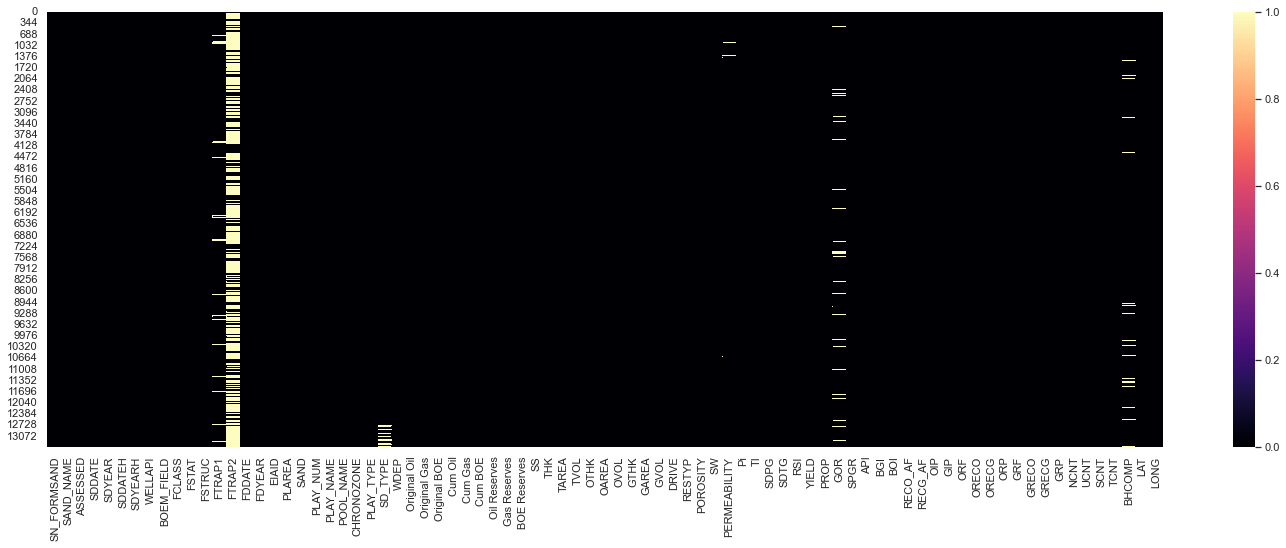

In [5]:
#check for missing values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [6]:
print(df.shape)

(13394, 81)


In [7]:
columns = df.applymap(np.isreal).all()

In [8]:
print((columns).value_counts())

True     64
False    17
dtype: int64


In [9]:
# SCREEN 1 Drop Unnecessary Columns
df.drop(['SN_FORMSAND', 'ASSESSED', 'SDDATE', 'SDYEAR', 'SDDATEH', 'SDYEARH', 'WELLAPI', 'FCLASS', 'FSTAT', 'FSTRUC', 
              'FTRAP1', 'FTRAP2', 'FDDATE', 'FDYEAR', 'EIAID', 'PLAREA', 'SAND', 
              'PLAY_NUM', 'PLAY_NAME', 'POOL_NAME', 'PLAY_TYPE', 'SD_TYPE', 'WDEP', 'Original Gas', 
              'Original BOE', 'Cum Oil', 'Cum Gas', 'Cum BOE', 'Oil Reserves', 'Gas Reserves', 'BOE Reserves', 'TVOL', 
              'OTHK', 'OAREA', 'OVOL', 'GVOL', 'RESTYP', 'SDPG', 'SDTG', 'YIELD', 'PROP', 'SPGR', 'BGI', 'RECO_AF', 'RECG_AF', 
              'OIP', 'GIP', 'ORECO', 'ORECG', 'ORP', 'GRECO', 'GRECG', 'GRP', 'NCNT', 'UCNT', 'SCNT', 'TCNT', 'BHCOMP'
               ], axis=1, inplace=True)

In [10]:
print(df.shape)

(13394, 23)


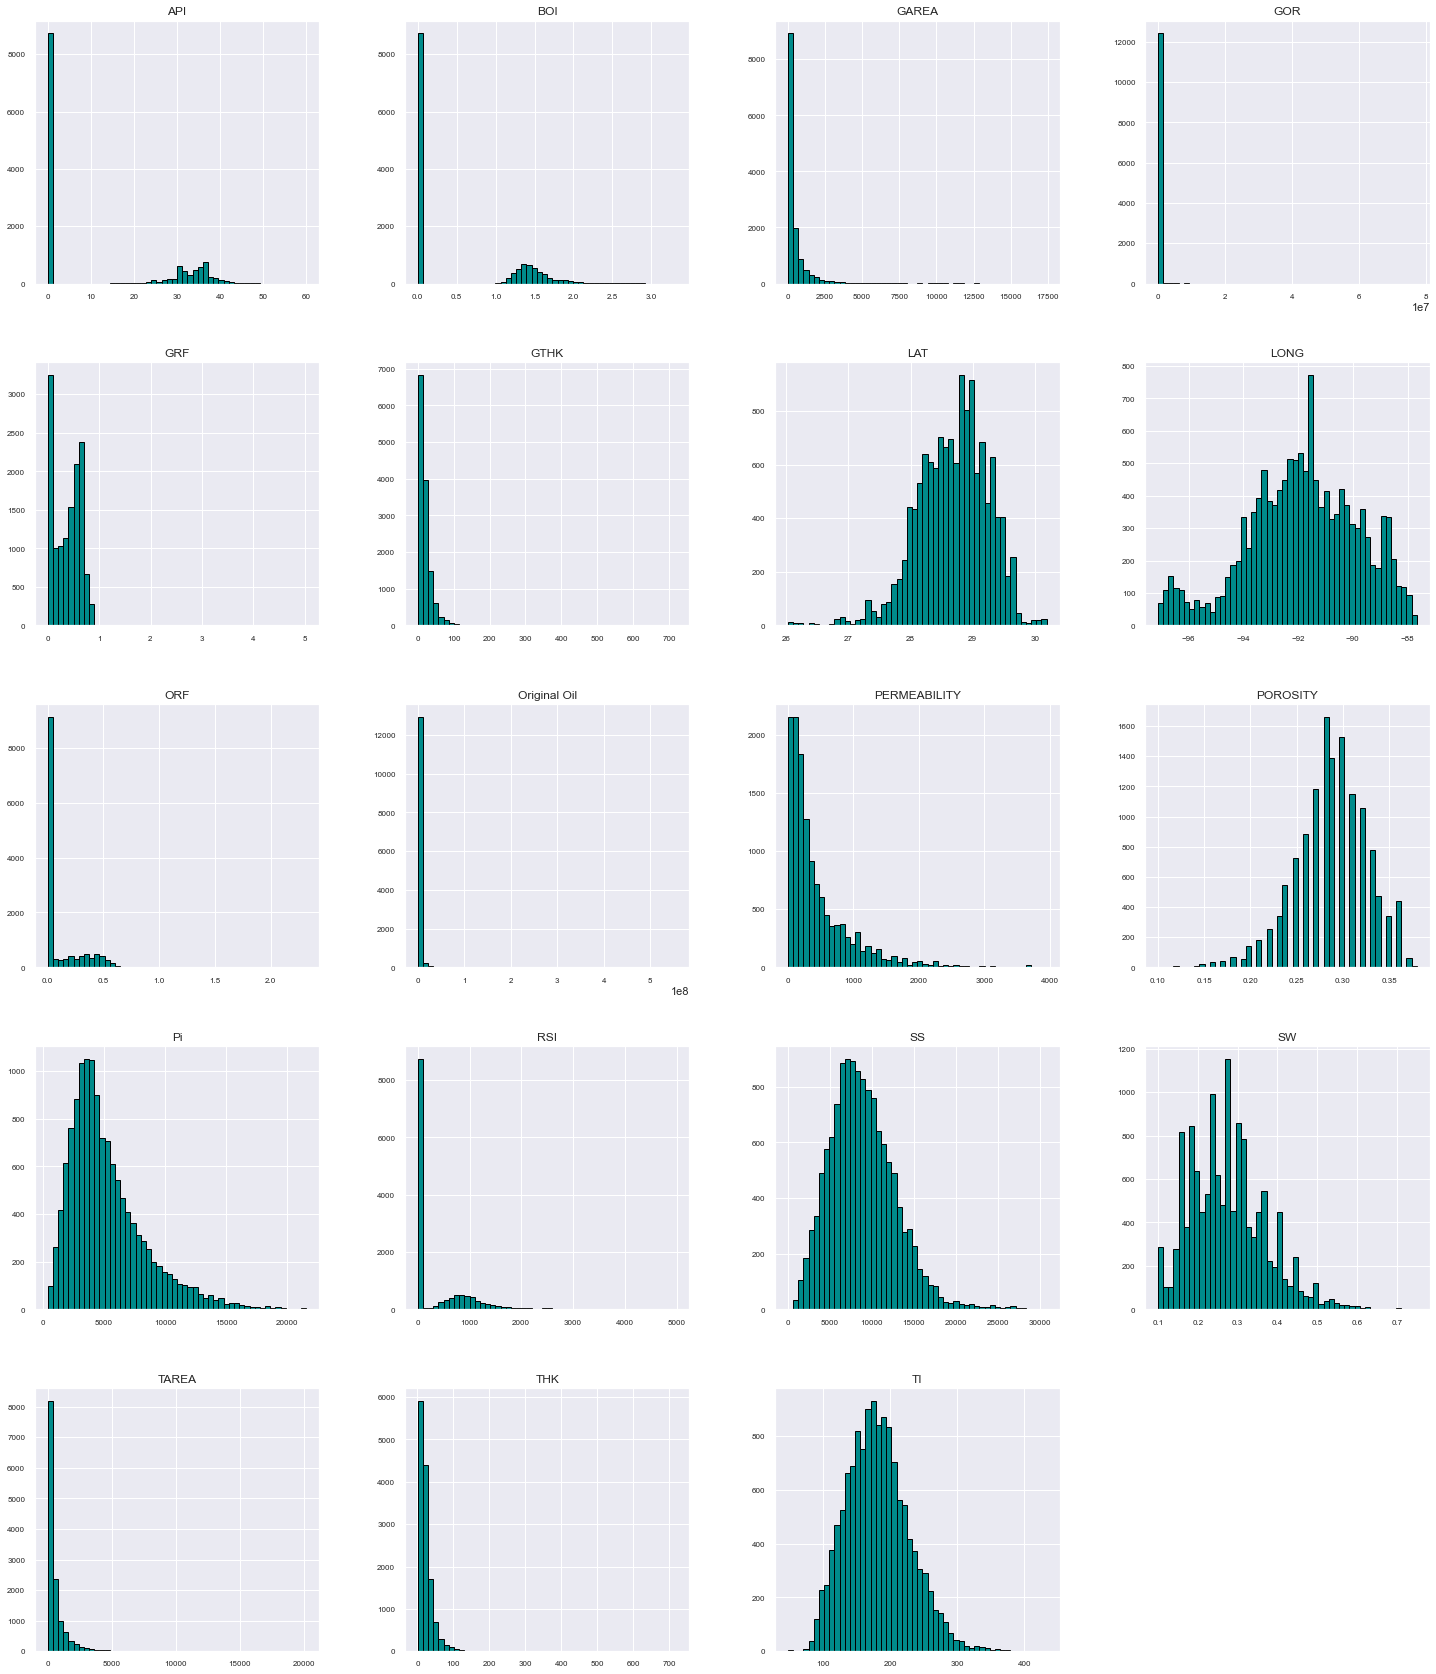

In [11]:
#Plot variables - Data Exploration 
fig_ = df.hist(figsize=(25, 30), bins=50, color="darkcyan",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

In [12]:
# SCREEN 2 Drop Unnecessary Columns
df.drop(['GRF'
               ], axis=1, inplace=True)

In [ ]:
# SCREEN 2a Drop Unnecessary Columns
df.drop(['LAT', 'LONG'
               ], axis=1, inplace=True)

In [ ]:
#Plot variables - Data Exploration 
fig_ = df.hist(figsize=(25, 30), bins=50, color="green",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
#Check Output varibale RFs
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["ORF"], color = "black");

In [ ]:
#Drop rows with no RFs
df = df[df['ORF'] != 0]

In [ ]:
#Plot URF output variable 
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["ORF"], color = "black");

In [ ]:
df.shape

In [ ]:
fig_ = df.hist(figsize=(25, 30), bins=50, color="red",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#a = 'Trap Type'
#print(df['API Gravity'].value_counts())
#df['API Gravity'](-1).count()
#df[a].value_counts()
#print(df[a].where(df[a] < 0).count())
#print(df[a].where(df[a] == 0).count())

In [ ]:
(df == 0).sum()

In [ ]:
df.drop(['GTHK', 'GAREA', 'GOR'
               ], axis=1, inplace=True)

In [ ]:
(df == 0).sum()

In [ ]:
df.isnull().sum()

In [ ]:
df2 = df._get_numeric_data()

In [ ]:
(df2 < 0).sum()

In [ ]:
df = df[df['PERMEABILITY'] != 0]

In [ ]:
df = df.dropna()

In [ ]:
df = df[df['SS'] != 0]

In [ ]:
df.shape

In [ ]:
df['PERMEABILITY'].describe()

In [ ]:
df.drop(['SAND_NAME', 'BOEM_FIELD'
               ], axis=1, inplace=True)

## Generate values for temperature as a function of depth (Dummy)

In [ ]:
# Generate values for missing permeability values as a function of porosity
a = df['SS']
b = df['TI']

#b1 = df['RPT_Viscosity']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
#plt.scatter(a, b1, color='orange')
plt.xlabel("Depth (TVDss ft)", size=14)
plt.ylabel("Temperature (DegF))", size=14)
#plt.yscale('log', nonposy='clip')
#plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()
plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

cdf2 = df[['TI', 'SS']]
testdf2 = cdf2[cdf2['TI'].isnull()==False].fillna(0)
traindf2 = cdf2[cdf2['TI'].isnull()==False].fillna(0)

y2 = df['TI']
traindf2.drop('TI', axis=1, inplace=True)
#ln_y2 = np.log(y2)

lr.fit(traindf2,y2)
testdf2.drop('TI', axis=1, inplace=True)
pred = lr.predict(testdf2)
#pred2 = np.exp(lr.predict(testdf2))
testdf2['TI'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf2 = testdf2.rename(columns={'SS': 'RPT_SS', 
                                'TI': 'RPT_TI'
                               })

In [ ]:
df = pd.concat([df, testdf2], axis=1)

In [ ]:
# Generate values for missing permeability values as a function of porosity
a = df['SS']
b = df['TI']

b1 = df['RPT_TI']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.scatter(a, b1, color='orange')
plt.xlabel("SS", size=14)
plt.ylabel("TI", size=14)
#plt.yscale('log', nonposy='clip')
#plt.ylim([0.01, 100000])
plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [ ]:
df = df.drop([
    'RPT_TI', 'RPT_SS', 
], axis = 1) 

In [ ]:
# Generate values for missing permeability values as a function of porosity
a = df['POROSITY']
b = df['PERMEABILITY']

#b1 = df['RPT_Viscosity']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
#plt.scatter(a, b1, color='orange')
plt.xlabel("Por", size=14)
plt.ylabel("Perm", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [ ]:
df.to_excel(r'dfBOEMGOM.xlsx', index = False, header=True)